In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
pwd

'/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH'

In [4]:
#read in all the data into one pandas frame
def create_df(source):
    source_dir = '/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/' + source
    print(source_dir)
    
    #move into the iop folder
    os.chdir(source_dir)
    
    df = pd.DataFrame()
    for i, file_name in enumerate(os.listdir(source_dir)):
        if file_name.endswith('.FLX1'):
            print(file_name)
    #        print(i)
            x = pd.read_table(file_name,delimiter=r"\s+")
            df = pd.concat([df,x],axis=0)            
    return df


In [25]:
#%pwd
#source directory inside SPLASH directory
#source = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
file_dir = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
KP10_flux_df = create_df(file_dir)

file_dir = 'Tower_Data/Kettle_Ponds/KPB22_001-365'
KP03_flux_df = create_df(file_dir)


/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365
KPA22_001.FLX1
KPA22_002.FLX1
KPA22_003.FLX1
KPA22_004.FLX1
KPA22_005.FLX1
KPA22_006.FLX1
KPA22_007.FLX1
KPA22_008.FLX1
KPA22_009.FLX1
KPA22_010.FLX1
KPA22_011.FLX1
KPA22_012.FLX1
KPA22_013.FLX1
KPA22_014.FLX1
KPA22_015.FLX1
KPA22_016.FLX1
KPA22_017.FLX1
KPA22_018.FLX1
KPA22_019.FLX1
KPA22_020.FLX1
KPA22_021.FLX1
KPA22_022.FLX1
KPA22_023.FLX1
KPA22_024.FLX1
KPA22_025.FLX1
KPA22_026.FLX1
KPA22_027.FLX1
KPA22_028.FLX1
KPA22_029.FLX1
KPA22_030.FLX1
KPA22_031.FLX1
KPA22_032.FLX1
KPA22_033.FLX1
KPA22_034.FLX1
KPA22_035.FLX1
KPA22_036.FLX1
KPA22_037.FLX1
KPA22_038.FLX1
KPA22_039.FLX1
KPA22_040.FLX1
KPA22_041.FLX1
KPA22_042.FLX1
KPA22_043.FLX1
KPA22_044.FLX1
KPA22_045.FLX1
KPA22_046.FLX1
KPA22_047.FLX1
KPA22_048.FLX1
KPA22_049.FLX1
KPA22_050.FLX1
KPA22_051.FLX1
KPA22_052.FLX1
KPA22_053.FLX1
KPA22_054.FLX1
KPA22_055.FLX1
KPA22_056.FLX1
KPA22_057.FLX1
KPA22_058.FLX1
KPA22_059.FLX1
KPA22_060.FLX1
KPA22_061.FLX1
KPA

In [26]:

KP10_flux_df['date'] = pd.to_datetime(KP10_flux_df.date,format='%Y-%m-%d')
KP03_flux_df['date'] = pd.to_datetime(KP03_flux_df.date,format='%Y-%m-%d')


<Axes: xlabel='date'>

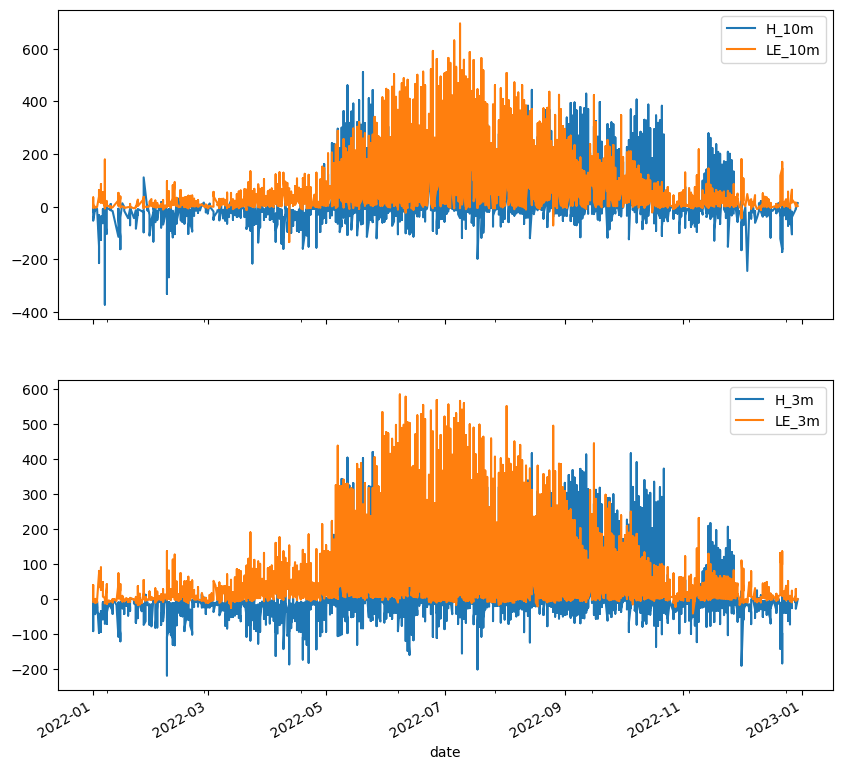

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

def flux_qc_10(flux_df):
    #NAN filter
    H_f1 = flux_df['H_10m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_10m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


def flux_qc_03(flux_df):
    #NAN filter
    H_f1 = flux_df['H_3m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_3m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


flux_qc_10(KP10_flux_df).plot(x='date',y='H_10m',ax=ax1)
flux_qc_10(KP10_flux_df).plot(x='date',y='LE_10m',ax=ax1)

flux_qc_03(KP03_flux_df).plot(x='date',y='H_3m',ax=ax2)
flux_qc_03(KP03_flux_df).plot(x='date',y='LE_3m',ax=ax2)


Check out mid day bowen ratio, and soil moisture at the two levels.

In [37]:
KP10_flux_qc_df = flux_qc_10(KP10_flux_df).copy()
KP03_flux_qc_df = flux_qc_03(KP03_flux_df).copy()

In [38]:
# print(flux_qc_10(KP10_flux_df)['LE_10m'].size)
# print(flux_qc_03(KP03_flux_df)['LE_3m'].size)
#take the same time and make a df with entries at the same time:

flux_df_combined = pd.DataFrame()

flux_df_combined['date'] = KP10_flux_qc_df['date']
flux_df_combined['time'] = KP10_flux_qc_df['date']


In [39]:
flux_df_combined = flux_df_combined.merge(KP10_flux_qc_df, on='date', how='left')

,date,time(MST),DecDay,H_10m,qc_H,LE_10m,qc_LE,co2_flx_10m,co2_mix_ratio,Ts_10m,...,max_wind_speed,wind_dir,u*_10m,TKE_10m,u_var_10m,v_var_10m,w_var_10m,Ts_var_10m,co2_var_10m,h2o_var_10m
0,2022-01-01,07:30:00,1.312,-18.6,0,7.0,0,0.834,394.6,262.76,...,7.945,329.0,0.215,0.721,0.53993,0.77338,0.15612,0.02465,0.00017,1.90304
1,2022-01-01,08:30:00,1.354,-14.2,0,3.1,0,0.415,395.7,262.31,...,9.772,329.3,0.303,1.001,0.86659,0.98982,0.17554,0.01754,0.00029,1.33289
2,2022-01-01,09:00:00,1.375,-20.5,0,7.9,0,0.812,397.2,262.25,...,12.271,330.1,0.263,1.434,1.82205,0.85473,0.23089,0.05897,0.00039,2.40159
3,2022-01-01,09:30:00,1.396,-21.4,0,17.0,0,0.936,397.2,261.76,...,11.905,328.1,0.283,1.299,1.35666,1.02769,0.25895,0.03176,0.00029,5.42482
4,2022-01-01,10:30:00,1.438,-43.4,0,26.1,0,1.359,397.4,261.19,...,14.120,356.2,0.484,3.042,2.50340,3.08689,0.59763,0.03302,0.00023,5.89614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96928,2022-12-29,03:00:00,363.125,-9.4,0,1.3,0,0.309,388.1,264.81,...,7.242,317.2,0.153,0.308,0.26821,0.29366,0.06441,0.01414,0.00088,2.31901
96929,2022-12-29,09:00:00,363.375,-6.0,0,8.5,0,2.029,391.6,263.36,...,7.609,274.1,0.431,2.390,3.30400,1.30227,0.20918,0.01894,0.04592,18.44000
96930,2022-12-29,13:00:00,363.542,-7.2,0,12.1,0,0.642,387.9,264.07,...,10.297,330.2,0.469,3.244,2.59667,3.63467,0.31125,0.00870,0.00006,3.62909
96931,2022-12-29,13:30:00,363.562,-6.2,0,16.1,0,-0.180,388.2,264.06,...,8.966,297.9,0.354,1.636,1.50922,1.54902,0.25900,0.00642,0.00007,7.83805


In [46]:
trial_flag1 = KP10_flux_qc_df['date'] >= '2022-01-01'
trial_flag2 = KP10_flux_qc_df['date'] <= '2022-01-31'

KP10_flux_qc_df.loc[trial_flag1 & trial_flag2]

,date,time(MST),DecDay,H_10m,qc_H,LE_10m,qc_LE,co2_flx_10m,co2_mix_ratio,Ts_10m,...,max_wind_speed,wind_dir,u*_10m,TKE_10m,u_var_10m,v_var_10m,w_var_10m,Ts_var_10m,co2_var_10m,h2o_var_10m
14,2022-01-01,07:30:00,1.312,-18.6,0,7.0,0,0.834,394.6,262.76,...,7.945,329.0,0.215,0.721,0.53993,0.77338,0.15612,0.02465,0.00017,1.90304
16,2022-01-01,08:30:00,1.354,-14.2,0,3.1,0,0.415,395.7,262.31,...,9.772,329.3,0.303,1.001,0.86659,0.98982,0.17554,0.01754,0.00029,1.33289
17,2022-01-01,09:00:00,1.375,-20.5,0,7.9,0,0.812,397.2,262.25,...,12.271,330.1,0.263,1.434,1.82205,0.85473,0.23089,0.05897,0.00039,2.40159
18,2022-01-01,09:30:00,1.396,-21.4,0,17.0,0,0.936,397.2,261.76,...,11.905,328.1,0.283,1.299,1.35666,1.02769,0.25895,0.03176,0.00029,5.42482
20,2022-01-01,10:30:00,1.438,-43.4,0,26.1,0,1.359,397.4,261.19,...,14.120,356.2,0.484,3.042,2.50340,3.08689,0.59763,0.03302,0.00023,5.89614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2022-01-30,17:30:00,30.729,-47.3,0,7.8,0,1.096,390.7,275.35,...,8.805,301.7,0.364,2.024,1.09495,2.75654,0.23735,1.20765,0.00444,11.53830
35,2022-01-30,18:00:00,30.750,-110.0,0,19.0,0,3.444,390.5,274.41,...,9.037,289.7,0.345,1.226,0.75547,1.42205,0.33266,0.99408,0.00411,10.40010
30,2022-01-31,15:30:00,31.646,-54.3,0,28.9,0,0.335,392.2,273.86,...,8.878,302.3,0.540,4.067,3.87876,3.91721,0.40898,0.14733,0.00058,10.87000
32,2022-01-31,16:30:00,31.688,-69.1,0,13.8,0,1.859,389.7,272.22,...,5.215,119.1,0.257,0.761,0.45071,0.97295,0.11855,1.17504,0.00547,14.32520
